# Homework 2: Error Analysis of Euler Scheme (20 points)

Group Members: Julius Franke (el442, juliusttf@gmail.com), Erik Meister (kd400, erik.meister@me.com), Eugen Dizer (qo452, eugen9898@web.de)

Due on Friday, 08.05.2020.

In [63]:
#Load standard libraries
import numpy as np   
import matplotlib.pyplot as plt   
%matplotlib inline

## Introduction: The Two-Body Problem

Newton’s Equation for the relative motion of two bodies under their mutual gravitational force is 

$$\ddot{\bf{r}} = - \frac{GM}{r^2}\frac{\bf{r}}{r} \, ,$$

where $G$ is the gravitational constant and $M = m1+m2$ the sum of the masses of the two bodies. This second order ordinary differential equation (ODE) can be transformed into two coupled first order ODEs by

$$\dot{\bf{r}} = {\bf{v}} \, , \qquad \dot{\bf{v}} = - \frac{GM}{r^2}\frac{\bf{r}}{r} \,.$$

For numerical studies these equations should be first transformed to dimensionless equations by ${\bf{s}}={\bf{r}}/R_0$, $\tau = t/T_0$ and ${\bf{w}}={\bf{v}}/V_0$, where $R_0$ is an arbitrary scaling radius, which should be selected according to the
given problem (e.g. initial separation), $T_0 = \sqrt{R_0^3/GM}$ and $V_0 = \sqrt{GM/R_0}$.

In the following we will numerically solve the two coupled first order ODEs

$$\frac{d{\bf{s}}}{d\tau} = {\bf{w}} \, , \qquad \frac{d{\bf{w}}}{d\tau} = - \frac{{\bf{s}}}{s^3} \,.$$

Maybe some words about the Euler Scheme... How does it work. Define the important quantities like eccentricity, ...

## Our Code for the Euler Scheme from the Practice Class

In [144]:
#Define constants
G = 1
M1 = 1
M2 = 1
R0 = 0.5
V0 = np.sqrt(G*(M1+M2)/R0)
T0 = R0/V0

#Initial conditions
r0 = np.array([1,0,0])
v0 = np.array([0,V0/np.sqrt(2),0])

#Time steps
dt = 0.0001

#Dimensionless quantities
d_tau = dt/T0
s0 = r0/R0
w0 = v0/V0

#Integration time
T = 20

In [145]:
#Forward Euler Scheme
def forward_euler(s0, w0, d_tau, T):
    tau = np.arange(0,T,d_tau)
    s = s0
    w = w0
    for i in tau:
        s1 = s
        s = s + w*d_tau
        w = w - s1/np.linalg.norm(s1)**3 * d_tau
    return s, w

In [146]:
forward_euler(s0,w0,d_tau,T)

(array([ 1.42807541,  1.40548517,  0.        ]),
 array([-0.4955473 ,  0.50357278,  0.        ]))

In [147]:
#For plotting the trajectory
def plot_trajectory(s0, w0, d_tau, T):
    tau = np.arange(0,T,d_tau)
    x = []
    y = []
    s = s0
    w = w0
    for i in tau:
        x.append(s[0])
        y.append(s[1])
        
        s1 = s
        s = s + w*d_tau
        w = w - s1/np.linalg.norm(s1)**3 * d_tau
    plt.figure(figsize=(5.0,5.0))
    plt.plot(x,y)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

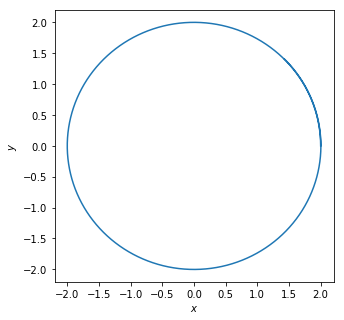

In [148]:
plot_trajectory(s0, w0, d_tau, T)

In [117]:
#Runge-Renz-Laplace vector
def runge_lenz_vec(s, w):
    return np.cross(w,np.cross(s,w))-s

In [118]:
#Eccentricity
def eccentricity(s, w):
    return np.linalg.norm(runge_lenz_vec(s,w))/(G*(M1*M2))

### a) Choose 3 different eccentricities by varying the initial velocity, and study the set-up for a wide range of different time steps. Make sure that $\Delta{t}$ spans orders of magnitude. Integrate the 2-body problem for two orbits. 

In [119]:
#Vary initial velocity
v0 = np.array([0,V0/np.sqrt(2),0])
w0 = v0/V0

s = forward_euler(s0, w0, d_tau, T)[0]
w = forward_euler(s0, w0, d_tau, T)[1]
print(eccentricity(s, w))

1.34163597528


In [123]:
for i in range(1,10,11):
    s = forward_euler(s0, w0, i/1000, T)[0]
    w = forward_euler(s0, w0, i/1000, T)[1]
    print(eccentricity(s, w))

1.00884571455


### Plot, in a double-logarithmic fashion, the error in the energy at the end of this orbit as a function of the time step $\Delta{t}$. 

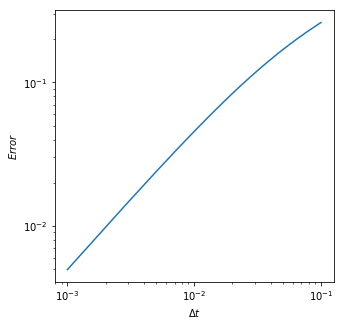

In [115]:
def energy_error(d_tau):
    E0 = (np.linalg.norm(w0)**2)/2 - 1/np.linalg.norm(s0)
    s = forward_euler(s0, w0, d_tau, T)[0]
    w = forward_euler(s0, w0, d_tau, T)[1]
    Energy = (np.linalg.norm(w)**2)/2 - 1/np.linalg.norm(s)
    return np.abs(Energy-E0)/np.abs(E0)

dtau = np.linspace(0.001,0.1,50)
error = []

for i in dtau:
    error.append(energy_error(i))

plt.figure(figsize=(5.0,5.0))
plt.loglog(dtau,error)
plt.xlabel(r'$\Delta t$')
plt.ylabel(r'Relative Error')

### Discuss the result, is it consistent with what one should expect?

...

### b) Do the same as above, but now employ the leapfrog integrator scheme. How does the result change? 

In [ ]:
#Code
